In [41]:
# Supressing the warning messages

import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
# Import data 
Data = pd.read_csv('C:/Users/ROUNAK/Desktop/AirPassengers.csv')
Data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Change date format to Date time from sting
Data['Month'] = pd.to_datetime(Data['Month'],infer_datetime_format=True)
Index_Data = Data.set_index(['Month'])

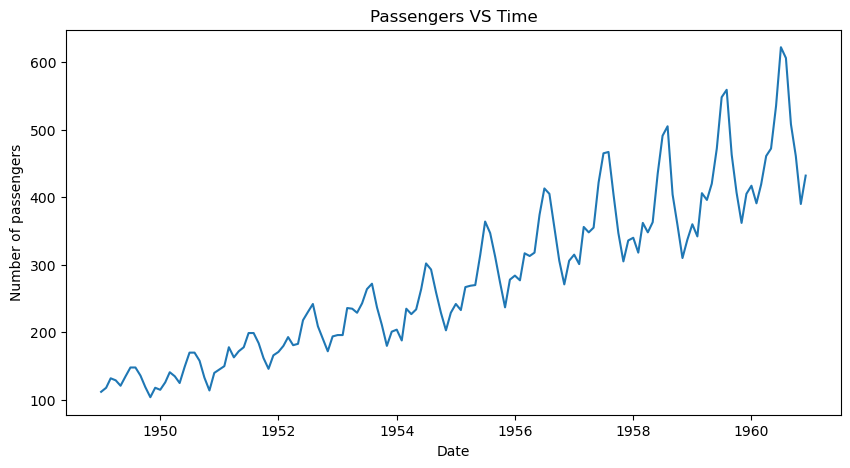

In [4]:
# Plotting Graph passenger vs time Graph
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.title('Passengers VS Time')
plt.plot(Index_Data)

In [5]:
# Determining rolling Statistics
Roll_Mean = Index_Data.rolling(window=12).mean()
print(Roll_Mean)
Roll_STD = Index_Data.rolling(window=12).std()
print(Roll_STD)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


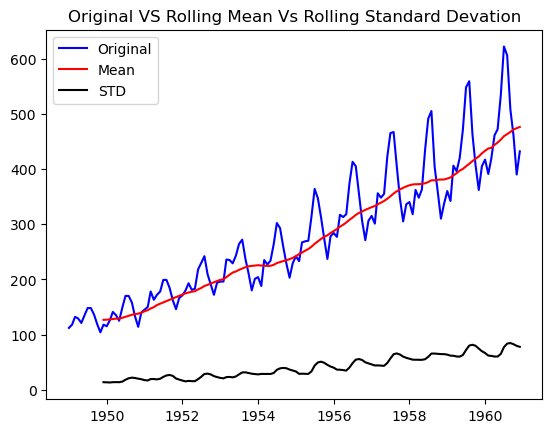

<Figure size 1000x1500 with 0 Axes>

In [6]:
# Plot rolling statistics
original = plt.plot(Index_Data, color = 'Blue', label = 'Original')
Mean = plt.plot(Roll_Mean, color = 'Red', label = 'Mean')
S_T_D = plt.plot(Roll_STD, color = 'Black', label = 'STD')
plt.legend(loc='best')
plt.title('Original VS Rolling Mean Vs Rolling Standard Devation')
plt.figure(figsize=(10,15))
plt.show()

In [7]:
# Perform Dickey Fuller Test:
from statsmodels.tsa.stattools import adfuller

print('Result for Dickey Fuller Test:')

Df_test = adfuller(Index_Data['#Passengers'], autolag= 'AIC')

DF_Output = pd.Series(Df_test[0:4], index = ['Test Statistics', 'p-value', '#Lag Used', 'Numeber of Observations'])

for key,value in Df_test[4].items():
    DF_Output['Critical Area value (%s)'%key] = value

print(DF_Output)

Result for Dickey Fuller Test:
Test Statistics                0.815369
p-value                        0.991880
#Lag Used                     13.000000
Numeber of Observations      130.000000
Critical Area value (1%)      -3.481682
Critical Area value (5%)      -2.884042
Critical Area value (10%)     -2.578770
dtype: float64


Text(0, 0.5, 'Log Pass count')

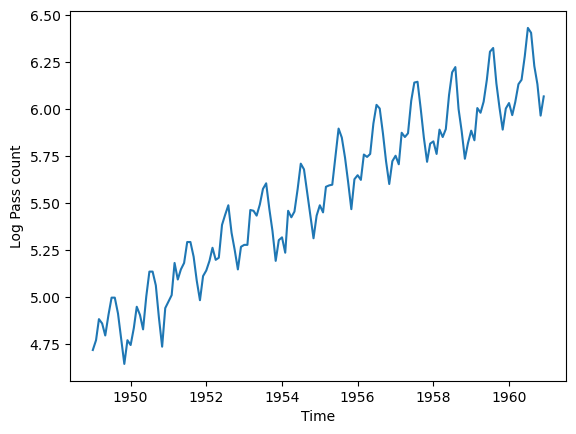

In [8]:
# Estimating Trends

Index_Log_Scale_Data = np.log(Index_Data)
plt.plot(Index_Log_Scale_Data)
plt.xlabel('Time')
plt.ylabel('Log Pass count')

Text(0.5, 1.0, 'LOG Orginal VS Mean')

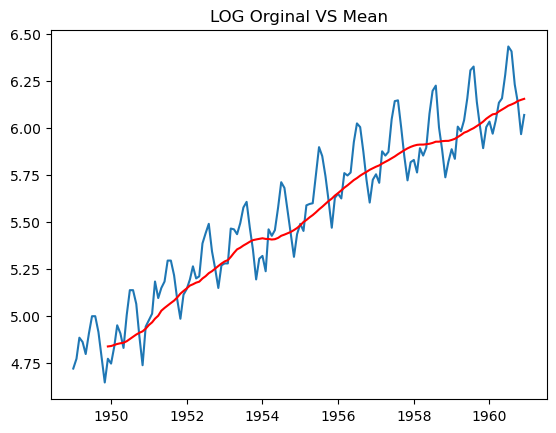

In [9]:
# Plotting with Log time series

Moving_Average = Index_Log_Scale_Data.rolling(window=12).mean()
Moving_STD = Index_Log_Scale_Data.rolling(window=12).std()
plt.plot(Index_Log_Scale_Data)
plt.plot(Moving_Average,color = 'Red')
plt.title("LOG Orginal VS Mean")

In [10]:
# Data - Moving Average

LOG_Data_Minus_Moving_Average = Index_Log_Scale_Data - Moving_Average
LOG_Data_Minus_Moving_Average.head(12)

# Remove Null Value
LOG_Data_Minus_Moving_Average.dropna(inplace= True)
LOG_Data_Minus_Moving_Average.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [11]:
# Checking Stationary Data

def Check_Stationarity_LOG_Index_Data(Time_Series):
    
    # Determing Rolling Statistics
    Moving_Average_LOG_Data = Time_Series.rolling(window = 12).mean()
    Moving_STD_LOG_Data = Time_Series.rolling(window = 12).std()
    
    # Plot Rolling Stat
    
    Original = plt.plot(Time_Series, color = 'blue', label = 'Original')
    Mean = plt.plot(Moving_Average_LOG_Data, color = 'red', label = 'Mean')
    STD = plt.plot(Moving_STD_LOG_Data, color = 'black', label = 'STD')
    plt.legend(loc='best')
    plt.title("Rolling Mean VS Rolling STD for LOG Data")
    plt.xlabel("Time t")
    plt.ylabel("Value")
    plt.show(block='False')
    
    # Perform Dickey Fuller Test:
    from statsmodels.tsa.stattools import adfuller

    print('Result for Dickey Fuller Test:')

    Df_test = adfuller(Time_Series['#Passengers'], autolag= 'AIC')

    DF_Output = pd.Series(Df_test[0:4], index = ['Test Statistics', 'p-value', '#Lag Used', 'Number of Observations'])

    for key,value in Df_test[4].items():
        DF_Output['Critical Area value (%s)'%key] = value

    print(DF_Output)

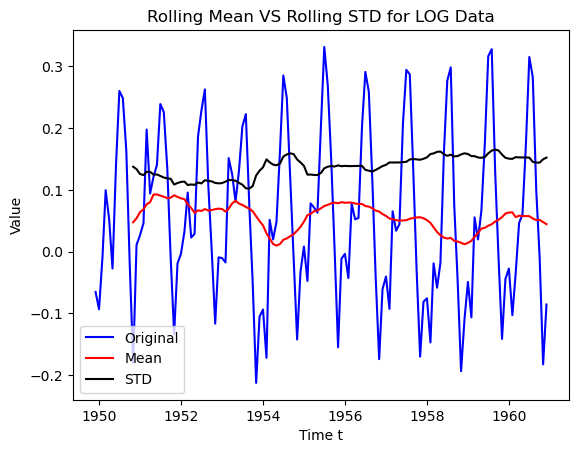

Result for Dickey Fuller Test:
Test Statistics               -3.162908
p-value                        0.022235
#Lag Used                     13.000000
Number of Observations       119.000000
Critical Area value (1%)      -3.486535
Critical Area value (5%)      -2.886151
Critical Area value (10%)     -2.579896
dtype: float64


In [12]:
Check_Stationarity_LOG_Index_Data(LOG_Data_Minus_Moving_Average)

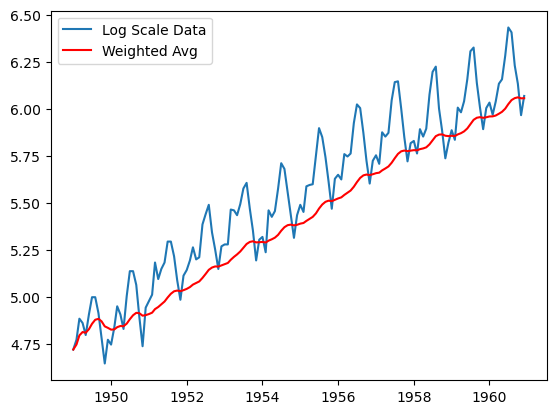

In [13]:
# Weighted Average 

Exponential_Decay_Weighted_Average = Index_Log_Scale_Data.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(Index_Log_Scale_Data,label = 'Log Scale Data')
plt.plot(Exponential_Decay_Weighted_Average, color='red',label = "Weighted Avg")
plt.legend()

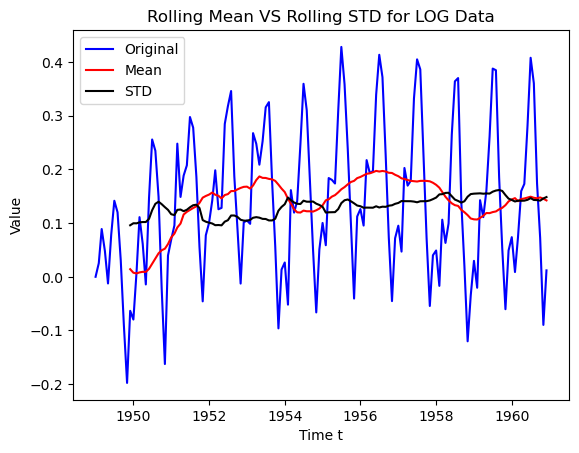

Result for Dickey Fuller Test:
Test Statistics               -3.601262
p-value                        0.005737
#Lag Used                     13.000000
Number of Observations       130.000000
Critical Area value (1%)      -3.481682
Critical Area value (5%)      -2.884042
Critical Area value (10%)     -2.578770
dtype: float64


In [14]:
# Log Index Data VS Exponential Weighted AVG

Data_Log_Minus_Moving_Exponential_Decay_AVG = Index_Log_Scale_Data - Exponential_Decay_Weighted_Average
Check_Stationarity_LOG_Index_Data(Data_Log_Minus_Moving_Exponential_Decay_AVG)

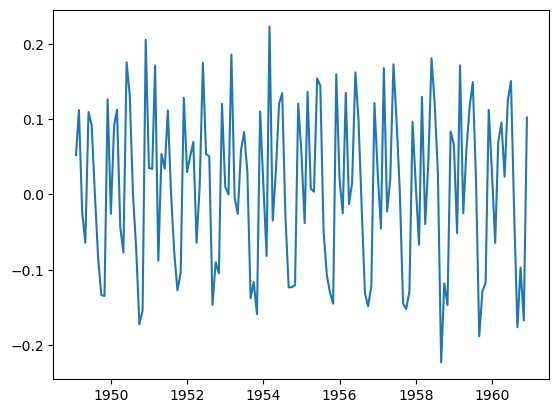

In [15]:
# Shift Data for Time Series 

Data_Log_diff_Shift = Index_Log_Scale_Data - Index_Log_Scale_Data.shift()
plt.plot(Data_Log_diff_Shift)

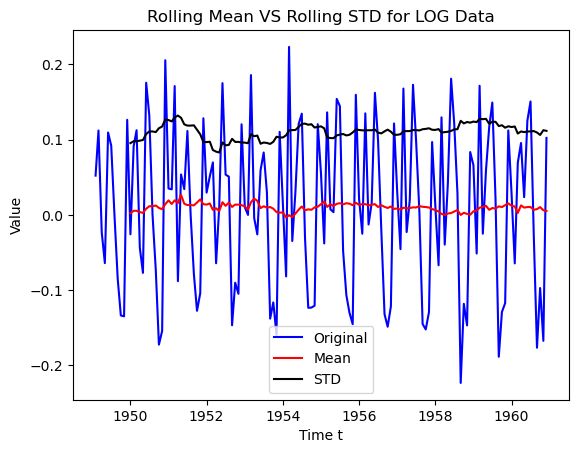

Result for Dickey Fuller Test:
Test Statistics               -2.717131
p-value                        0.071121
#Lag Used                     14.000000
Number of Observations       128.000000
Critical Area value (1%)      -3.482501
Critical Area value (5%)      -2.884398
Critical Area value (10%)     -2.578960
dtype: float64


In [16]:
# Drop Nan values

Data_Log_diff_Shift.dropna(inplace=True)
Check_Stationarity_LOG_Index_Data(Data_Log_diff_Shift)

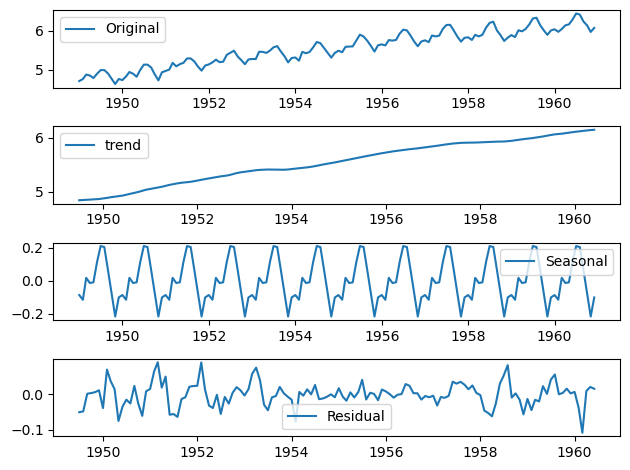

In [27]:
# Time Series ARIMA Model

from statsmodels.tsa.seasonal import seasonal_decompose

Decomposition = seasonal_decompose(Index_Log_Scale_Data)

Trend = Decomposition.trend
Seasonality = Decomposition.seasonal
Residual = Decomposition.resid

# Plotting the Data

plt.subplot(411)
plt.plot(Index_Log_Scale_Data,label = 'Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(Trend,label = 'trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(Seasonality,label = 'Seasonal')
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(Residual,label = 'Residual')
plt.legend(loc= 'best')

plt.tight_layout()


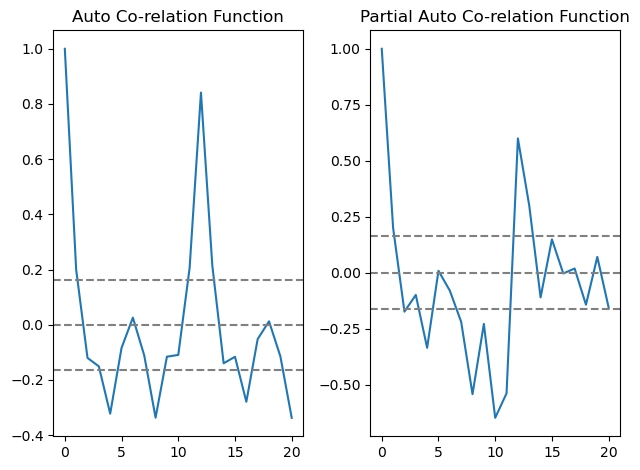

In [35]:
# ACF and PACF plots

from statsmodels.tsa.stattools import acf , pacf

Lag_acf = acf(Data_Log_diff_Shift, nlags= 20)
Lag_Pacf = pacf(Data_Log_diff_Shift, nlags=20, method='ols') # OLS = 'Ordinary Least Square Method'

# plot ACF

plt.subplot(121)
plt.plot(Lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'Gray')
plt.axhline(y=-1.96/np.sqrt(len(Data_Log_diff_Shift)),linestyle = '--', color = 'Gray')
plt.axhline(y=1.96/np.sqrt(len(Data_Log_diff_Shift)),linestyle = '--', color = 'Gray')
plt.title('Auto Co-relation Function')

# PLot Pacf

plt.subplot(122)
plt.plot(Lag_Pacf)
plt.axhline(y=0, linestyle = '--', color = 'Gray')
plt.axhline(y=-1.96/np.sqrt(len(Data_Log_diff_Shift)),linestyle = '--', color = 'Gray')
plt.axhline(y=1.96/np.sqrt(len(Data_Log_diff_Shift)),linestyle = '--', color = 'Gray')
plt.title('Partial Auto Co-relation Function')

plt.tight_layout()

In [55]:
# PLot Arima Model

from statsmodels.tsa.arima.model import ARIMA

#AR Model

Model = ARIMA(Index_Log_Scale_Data, order=(2,1,2))
Result_ARIMA = Model.fit()

Result_ARIMA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Mon, 04 Mar 2024   AIC                           -247.780
Time:                        20:12:05   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.464      -0.319       0.145
ma.L2         -0.6813      0.142     -4.785      0.000      -0.960      -0.402
sigma2         0.0096      0.002      5.730      0.000       0.006       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.94   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# Predicting The Values

Prediction_ARIMA_diff = pd.Series(Result_ARIMA.fittedvalues, copy =True)
Prediction_ARIMA_diff.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64

In [61]:
# Covert to cumulative sum

Prediction_ARIMA_diff_Cumulative = Prediction_ARIMA_diff.cumsum()
Prediction_ARIMA_diff_Cumulative.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378100
1949-05-01    19.202521
dtype: float64

In [65]:
# Prediction 
Prediction_ARIMA_LOG = pd.Series(Index_Log_Scale_Data['#Passengers'], index=Index_Log_Scale_Data.index)
Prediction_ARIMA_LOG = Prediction_ARIMA_LOG.add(Prediction_ARIMA_diff_Cumulative, fill_value=0)
Prediction_ARIMA_LOG.head()

Month
1949-01-01     4.718499
1949-02-01     9.489184
1949-03-01    14.377686
1949-04-01    19.237913
1949-05-01    23.998312
dtype: float64

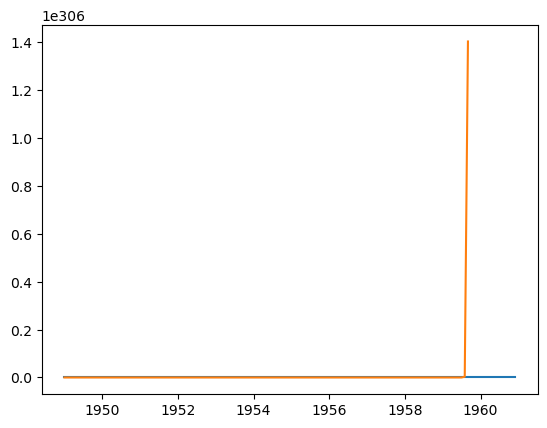

In [68]:
Prediction_ARIMA = np.exp(Prediction_ARIMA_LOG)
plt.plot(Index_Data)
plt.plot(Prediction_ARIMA)

In [69]:
Index_Log_Scale_Data

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


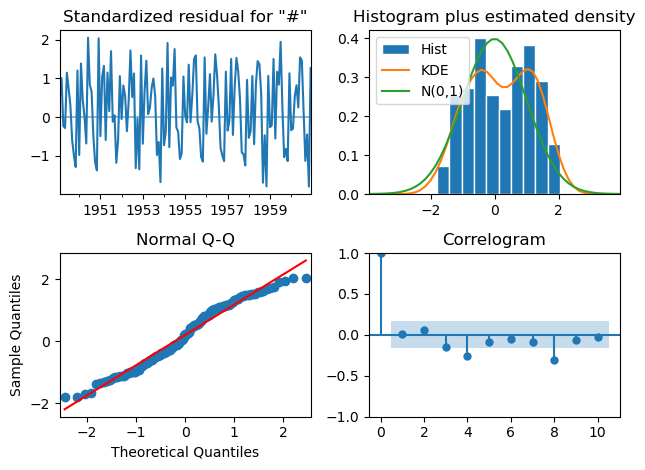

In [79]:
# Diagnoctics

Result_ARIMA.plot_diagnostics()
plt.tight_layout()

In [81]:
# Forecast Data for next 10 years 

Result_ARIMA.forecast(steps=120)

1961-01-01    6.157566
1961-02-01    6.122240
1961-03-01    6.137510
1961-04-01    6.131768
1961-05-01    6.134459
                ...   
1970-08-01    6.134126
1970-09-01    6.134126
1970-10-01    6.134126
1970-11-01    6.134126
1970-12-01    6.134126
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64